# Sub Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate the data
Create random points in the interval [-1, 1] with mean 0

In [2]:
def generate_the_data(point_num, interval=[-1.0, 1.0]):
    # Generate the points (x,y): make sure the mean is 0
    point_x = np.array([100, -100])
    while point_x.max()>1.0 and point_x.min()<-1.0:
        point_x = np.random.uniform(low=interval[0], high=interval[1], size=point_num)
        point_x -= point_x.mean()
    
    # y is column vector
    point_y = np.random.uniform(low=-1, high=1, size=point_num)[:, np.newaxis] #column vector
    return point_x, point_y

point_num = 5
point_x, point_y = generate_the_data(5)
print('Generated the data. \nThe points x: {}.\nThe point y:{}'.format(point_x,point_y.transpose()))

Generated the data. 
The points x: [-0.42642588  0.41326588 -0.91459311  0.84354539  0.08420773].
The point y:[[-0.62178811  0.61797565 -0.2164292   0.15706961  0.63755061]]


## X data matrix
create data matrix
$X = \begin{bmatrix}
    1       & 1 & 1 & \dots & 1\\
    x_1       & x_{2} & x_{3} & \dots & x_{point\_num} \\
     \vdots & \vdots  & \vdots  & \dots & \vdots\\
    x_{1}^{poly\_degree}     & x_{2}^{poly\_degree} & x_{3}^{poly\_degree} & \dots & x_{point\_num}^{poly\_degree}
\end{bmatrix}$

$y= X^T \theta + e$

In [3]:
def create_data_matrix(point_x, poly_degree):
    X = []
    for n in range(poly_degree + 1):
        # create feature vector and add to data matrix
        X.append(point_x**n)
    X = np.asarray(X)
    return X
poly_degree = 1
X = create_data_matrix(point_x, poly_degree)
print('The data matrix X: {}'.format(X))

The data matrix X: [[ 1.          1.          1.          1.          1.        ]
 [-0.42642588  0.41326588 -0.91459311  0.84354539  0.08420773]]


## Least sqaure estimator
 $\theta=(XX^T)^{-1}Xy$

In [4]:
def fit_least_sqaures_estimator(X, point_y, poly_degree, interval=[-1, 1]):
    theta = np.linalg.inv(np.matmul(X, X.transpose())).dot(X).dot(point_y)
    y_least_square = []
    x_least_square = np.linspace(interval[0], interval[1], 100)[:, np.newaxis]
    for x_n in x_least_square.tolist():
        temp = []
        for n in range(poly_degree + 1):
            temp.append(np.array(x_n)**n)
        x_n = np.asarray(temp)

        y_least_square.append(float(x_n.transpose().dot(theta)))
    return theta, x_least_square.tolist(), y_least_square
theta, x_least_square, y_least_square = fit_least_sqaures_estimator(X, point_y, poly_degree)

# Calculate the Regret

Regret: $ log(\Gamma) = -log(1 - x_N^T (XX^T)^{-1} x_N) $

In [6]:
def calc_regret(X, poly_degree, interval=[-1, 1]):
    xxt_inv = np.linalg.inv(np.matmul(X,X.transpose())+np.finfo(float).eps)

    regret = []
    x_values = np.linspace(interval[0], interval[1], 1000)
    x_axis_values_list = []
    for x_value in x_values:
        
        # create feature vector [1 x x^2 ...]^T
        x_n = []
        for n in range(poly_degree + 1):
            x_n.append(np.array(x_value)**n)
        x_n = np.expand_dims(np.asarray(x_n), 1)
        
        gamma = 1 - np.matmul(np.matmul(x_n.transpose(), xxt_inv), x_n)
        if gamma <= 0:
            continue
        regret.append(-np.log10(gamma))
        x_axis_values_list.append(x_value)
    regret = np.asarray(regret).squeeze(-1)
    return x_axis_values_list, regret

x_axis_values, regret_values = calc_regret(X, poly_degree)

# Run simulation
1. create random points in the interval [-1, 1] with mean 0
2. create data matrix X
3. fit Least sqaure estimator $\theta=(XX^T)^{-1}Xy$
4. calculate and plot the Regret: $ log(\Gamma) = -log(1 - x_N^T (XX^T)^{-1} x_N) $

In [7]:
#----------------------
# 0. Parameters
#----------------------

# number of data point to train on
point_num = 10

# Polynom degree to fit
poly_degree = 4

#----------------------
# 1. Generate the data
#----------------------
point_x, point_y = generate_the_data(point_num)
print('1. Generated the data.\n x:{}.\n y:{}.'.format(point_x, point_y.transpose()))

#----------------------
# 2. Create data matrix
#----------------------
X = create_data_matrix(point_x, poly_degree)
print('2. Created the matrix data X')

#----------------------
# 3. Fit least sqaure estimator
#----------------------
theta, x_list_square, y_list_sqaure = fit_least_sqaures_estimator(X, point_y, poly_degree)
thetha = np.linalg.inv(np.matmul(X, X.transpose())).dot(X).dot(point_y)
print('3. Fit least sqaure estimator. Theta={}'.format(np.round(thetha.transpose(),3)))

#----------------------
# 4. calculate the regret
#----------------------
x_values, regret_values = calc_regret(X, poly_degree)
print('4. Calculate the regret')
    

1. Generated the data.
 x:[-0.28361749  0.09665991 -0.83537305 -0.68532966  1.02129616  0.73384892
  0.64802071 -0.82136225  0.87312567 -0.74726892].
 y:[[ 0.08287325  0.24221791  0.32355791 -0.5353774   0.13885753 -0.68834353
  -0.89015336 -0.26644651 -0.92686273 -0.42794246]].
2. Created the matrix data X
3. Fit least sqaure estimator. Theta=[[ 0.357  0.272 -4.617 -1.155  5.065]]
4. Calculate the regret


# Plot

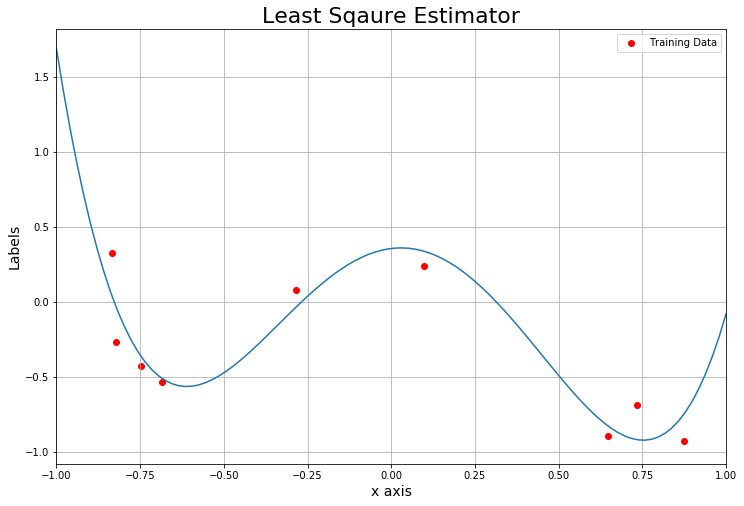

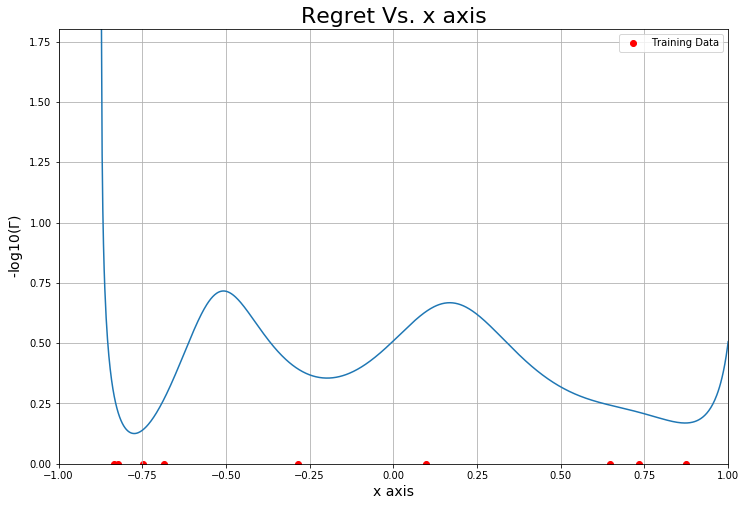

In [9]:
# Plot the estimated labels on the interval [-1, 1]
plt.figure(figsize=(12, 8))
plt.plot(x_list_square,  y_list_sqaure)
plt.scatter(point_x, point_y, label='Training Data', c='r')
plt.grid()
plt.ylabel('Labels', fontsize=14)
plt.xlabel('x axis', fontsize=14)
plt.title('Least Sqaure Estimator', fontsize=22)
plt.xlim([-1, 1])
plt.legend()
plt.show()

# Regret
plt.figure(figsize=(12, 8))
plt.plot(x_values, regret_values)
plt.scatter(point_x, np.zeros(point_x.shape), c='r', label='Training Data')
plt.grid()
plt.title('Regret Vs. x axis', fontsize=22)
plt.xlabel('x axis', fontsize=14)
plt.ylabel(r"-log10($\Gamma$)", fontsize=14)
plt.ylim([0, regret_values.max()])
plt.xlim([-1, 1])
plt.legend()
plt.show()
